### Import Data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import mysql.connector 

In [2]:
df_cust = pd.read_csv('dataset/customers.csv')
display(df_cust.head())
print(df_cust.shape)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single
2,3,Kriti Mangal,Male,21,City,Freelancer,22378.0,Married
3,4,Sara Dwivedi,Male,24,Rural,Freelancer,33563.0,Married
4,5,Aarohi Negi,Male,48,City,Consultant,39406.0,Married


(1000, 8)


In [3]:
df_cs = pd.read_csv("dataset/credit_profiles.csv")
df_trans = pd.read_csv("dataset/transactions.csv")
display(df_cs.head())
print(df_cs.shape)

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


(1004, 6)


In [4]:
display(df_trans.head())
print(df_trans.shape)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


(500000, 7)


In [5]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='s123',
    database='e_master_card'
)

conn

In [6]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


- Outliers are there for age min can't be 1
- Outliers are there for annual income as minimum cannot be 2


In [7]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

### Handling NA values for annual income 
- replace null values with median

In [8]:
df_cust[df_cust['annual_income'].isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,NaN,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,NaN,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,NaN,Married
102,103,Pooja Ganguly,Male,32,City,Data Scientist,NaN,Married
155,156,Krishna Trivedi,Male,24,City,Fullstack Developer,NaN,Married


In [9]:
occupation_wise_inc_median = df_cust.groupby("occupation")['annual_income'].median()
occupation_wise_inc_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [10]:
df_cust['annual_income'] = df_cust.apply(lambda row:occupation_wise_inc_median[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'],axis=1)
df_cust.iloc[[14,82,97]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Isha Arora,Female,25,Rural,Artist,45794.0,Married
82,83,Sanjana Singhal,Male,27,City,Freelancer,46759.0,Single
97,98,Sia Batra,Male,47,Suburb,Business Owner,261191.5,Married


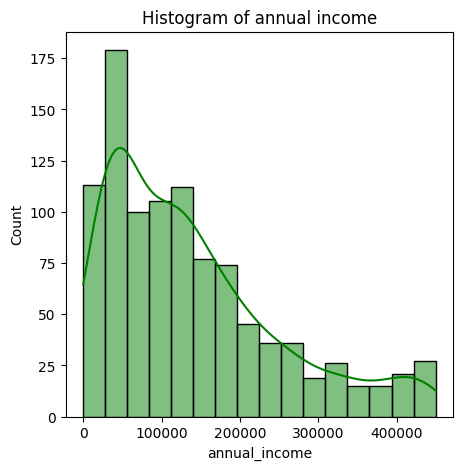

In [11]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust["annual_income"],kde=True,color='green',label="Data")
plt.title("Histogram of annual income")
plt.show()

### Treating outliers from annual income

In [12]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500
std,288.819436,15.666155,110969.408643
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,48229.500000
50%,500.500000,32.000000,113416.000000
75%,750.250000,46.000000,192614.000000
max,1000.000000,135.000000,449346.000000


Anything below $100 annual_income is an outlier

In [13]:
df_cust[df_cust['annual_income'] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,50.0,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,50.0,Married
316,317,Avinash Chauhan,Male,47,City,Consultant,50.0,Married
333,334,Samaira D'Souza,Female,29,City,Data Scientist,50.0,Married
340,341,Ridhi Rastogi,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Gauri Gupta,Male,54,City,Consultant,2.0,Married
592,593,Vivaan Pande,Female,32,City,Business Owner,50.0,Married
633,634,Aradhya Pandey,Male,26,City,Data Scientist,2.0,Married
686,687,Gauri Nanda,Male,40,City,Business Owner,2.0,Married
696,697,Avani Lalwani,Male,47,City,Consultant,20.0,Married


Replacing the outliers for annual income with occupation wise median annual income

In [14]:
df_cust.at[31,"annual_income"]

np.float64(50.0)

In [15]:
for index,row in df_cust.iterrows():
    if row['annual_income'] < 100:
        df_cust.at[index,"annual_income"] = occupation_wise_inc_median[row['occupation']] 
        

In [16]:
df_cust[df_cust['annual_income'] < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [17]:
df_cust.iloc[[31,262]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Gambhir,Male,50,City,Business Owner,261191.5,Married
262,263,Veer Rathod,Male,53,Suburb,Business Owner,261191.5,Married


### Data Visualization for annual income

In [18]:
avg_income_per_occupation = df_cust.groupby("occupation")["annual_income"].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [19]:
avg_income_per_occupation.index 

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [20]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

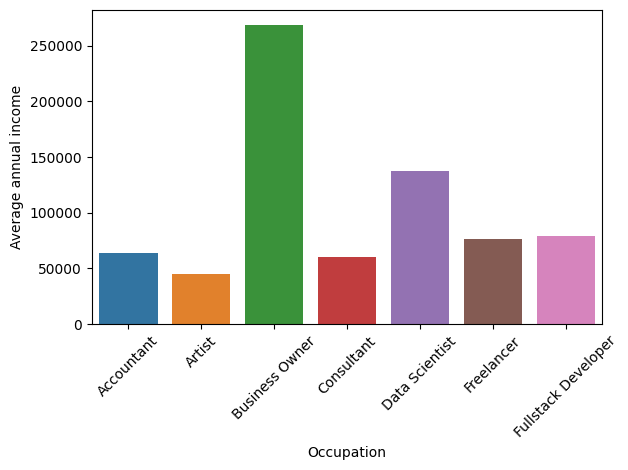

In [21]:
sns.barplot(x=avg_income_per_occupation.index,
            y=avg_income_per_occupation.values,
            palette='tab10',
            hue=avg_income_per_occupation.index)
plt.xlabel("Occupation")
plt.ylabel("Average annual income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Business owners get the highest avg annual_income
- Artists get the lowest avg annual_income

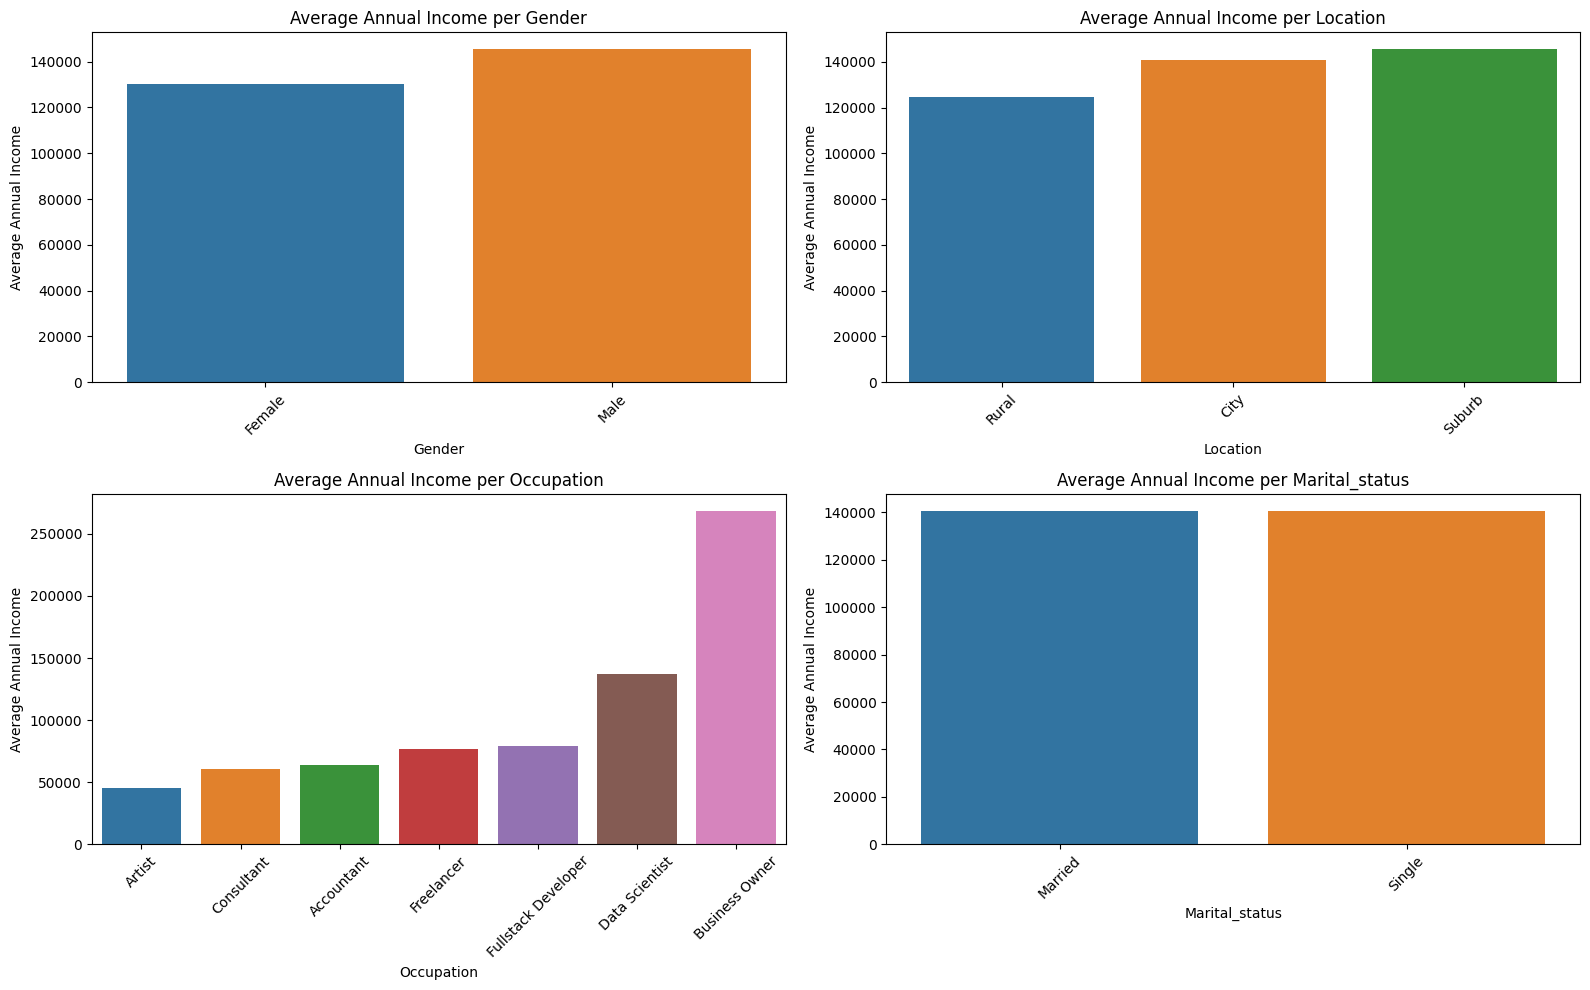

In [22]:
categorical_columns = ["gender","location","occupation","marital_status"]

fig,axs = plt.subplots(2,2,figsize=(16,10))
axes = axs.flatten()

for i,col in enumerate(categorical_columns): 
    
    avg_income_per_grp = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_grp.index,
                y=avg_income_per_grp.values,
                palette='tab10',
                hue=avg_income_per_grp.index,
                ax=axes[i])
    
    axes[i].set_title(f"Average Annual Income per {col.capitalize()}")
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel("Average Annual Income")
    axes[i].tick_params(axis='x',rotation=45)

plt.tight_layout()
plt.show()

- Males earning is more than females
- People in suburbs earn more than people in cities and rural areas 
- Business owners earn the most avg annual income 
- There is no difference in earnings of single or married people in avg income

### Treating the outliers from age

In [23]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140483.548500
std,288.819436,15.666155,110463.002934
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [24]:
outliers_age = df_cust[(df_cust["age"] < 15) | (df_cust['age'] > 80)]
outliers_age.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,2,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,110,City,Artist,7621.0,Married
165,166,Swara Mehtani,Female,1,City,Freelancer,39721.0,Single
174,175,Sneha Jaiswal,Male,110,City,Freelancer,23723.0,Married
222,223,Aaryan Bajaj,Male,110,Suburb,Freelancer,210987.0,Married


In [25]:
print(outliers_age.shape)

(20, 8)


In [26]:
occupation_wise_median_age = df_cust.groupby('occupation')['age'].median()
occupation_wise_median_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

Valid age median: [15-80]

In [27]:
for index,row in df_cust.iterrows():
    if row['age'] < 15 or row['age'] > 80:
        df_cust.at[index,'age'] = occupation_wise_median_age[row['occupation']].astype("int64")
        

In [28]:
df_cust.iloc[[0,41]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married
41,42,Manya Thakur,Male,26,City,Artist,7621.0,Married


In [29]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,35.539000,140483.548500
std,288.819436,12.277998,110463.002934
min,1.000000,18.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,44.250000,195514.250000
max,1000.000000,64.000000,449346.000000


### Data Visualization for Age,Gender,Location

Creating age_grp feature 

In [30]:
bin_edges = [17,25,48,65]
bin_labels = ["18-25","26-48","49-65"]

df_cust["age_group"] = pd.cut(df_cust['age'],
                              bins=bin_edges,
                              labels=bin_labels)
df_cust.head(2)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Dhruv Bansal,Female,51,City,Business Owner,358211.0,Married,49-65
1,2,Kabir Thakur,Female,47,City,Consultant,65172.0,Single,26-48


In [31]:
age_grp_counts = df_cust['age_group'].value_counts(normalize=True)*100
print(age_grp_counts)

age_group
26-48    56.7
18-25    24.6
49-65    18.7
Name: proportion, dtype: float64


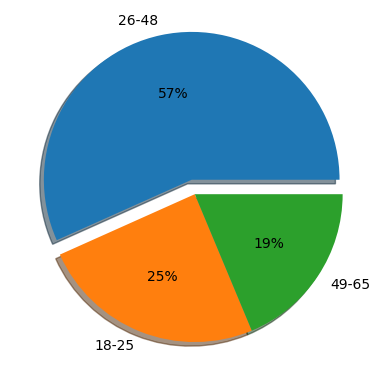

In [32]:
plt.pie(age_grp_counts,
        labels=age_grp_counts.index,
        autopct="%1.f%%",
        explode=(0.1,0,0), 
        # (0.1) tells us the seperation distance between different categories
        shadow=True)
plt.show()

In [33]:
df_cust['location'].value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [34]:
df_cust['gender'].value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [35]:
df_cust.groupby(['location','gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [36]:
df_cust.groupby(['location','gender']).size().index

MultiIndex([(  'City', 'Female'),
            (  'City',   'Male'),
            ( 'Rural', 'Female'),
            ( 'Rural',   'Male'),
            ('Suburb', 'Female'),
            ('Suburb',   'Male')],
           names=['location', 'gender'])

In [37]:
customer_location_gender = df_cust.groupby(['location','gender']).size().unstack()
# what unstack does is it moves the last level of multiindex into column
customer_location_gender

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


In [38]:
customer_location_gender.index

Index(['City', 'Rural', 'Suburb'], dtype='object', name='location')

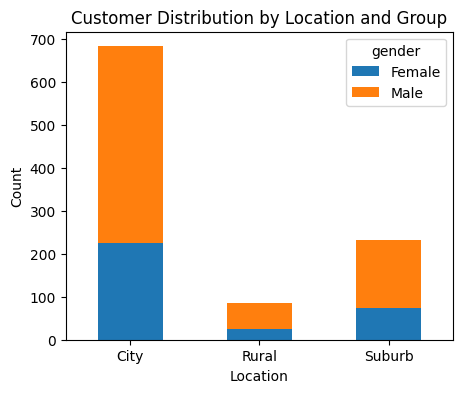

In [39]:
customer_location_gender.plot(kind='bar',stacked=True,figsize=(5,4))
plt.title("Customer Distribution by Location and Group")
plt.xlabel('Location')
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

### Data cleaning: Credit Score

In [40]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [41]:
df_cs.shape

(1004, 6)

In [42]:
df_cust.shape

(1000, 9)

We have extra 4 rows in this table compared to the original customer table

In [43]:
df_cs['cust_id'].nunique()

1000

In [44]:
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [45]:
df_cs_clean_1 = df_cs.drop_duplicates(subset="cust_id",keep="last")
df_cs_clean_1.shape

(1000, 6)

In [46]:
df_cs_clean_1[df_cs_clean_1.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [47]:
df_cs_clean_1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64